In [1]:
# !pip install matplotlib
# !pip install seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
users = pd.read_csv('../data/users.csv')

In [4]:
users

,user_id,location,age
0,8,"timmins, ontario, canada",NaN
1,11400,"ottawa, ontario, canada",49.0
2,11676,"n/a, n/a, n/a",NaN
3,67544,"toronto, ontario, canada",30.0
4,85526,"victoria, british columbia, canada",36.0
...,...,...,...
68087,278376,"danville, pennsylvania, usa",54.0
68088,278621,"victoria, delaware, canada",74.0
68089,278636,"irvington, alabama, usa",NaN
68090,278659,"vancouver, washington, usa",33.0


In [5]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68092 entries, 0 to 68091
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   68092 non-null  int64  
 1   location  68092 non-null  object 
 2   age       40259 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.6+ MB


## user_id

요약:
- 중복이나 null 값 없음
- 특이사항 없음

In [6]:
users.sort_values('user_id')['user_id'][:20]

0        8
73       9
668     12
670     14
2553    16
2959    17
3107    19
3131    22
3144    26
3526    32
3565    39
3639    42
3729    44
3968    51
4134    53
4158    56
4195    64
4196    67
4522    69
4541    70
Name: user_id, dtype: int64

In [7]:
# user_id는 중복, null 없음
users['user_id'].value_counts(dropna=False).unique()

array([1])

## location

요약:
- 미션 코드처럼 전처리가 필요해보임 (특수문자 제거, {city, state, country} 분할, 값 채우기)
- 분할 후 각 열에서 약 절반 정도의 범주가 데이터를 1개씩만 가지고 있음 -> 병합할 필요성 있어보임
- country를 봤을 때 usa에 극단적으로 몰려 있음

In [8]:
users

,user_id,location,age
0,8,"timmins, ontario, canada",NaN
1,11400,"ottawa, ontario, canada",49.0
2,11676,"n/a, n/a, n/a",NaN
3,67544,"toronto, ontario, canada",30.0
4,85526,"victoria, british columbia, canada",36.0
...,...,...,...
68087,278376,"danville, pennsylvania, usa",54.0
68088,278621,"victoria, delaware, canada",74.0
68089,278636,"irvington, alabama, usa",NaN
68090,278659,"vancouver, washington, usa",33.0


In [9]:

## 코랩이랑 달리 수정 필요
users['location'] = users['location'].str.replace(r'[^0-9a-zA-Z:,]', '', regex=True) # 특수문자 제거

users['location_city'] = users['location'].apply(lambda x: x.split(',')[0].strip())
users['location_state'] = users['location'].apply(lambda x: x.split(',')[1].strip())
users['location_country'] = users['location'].apply(lambda x: x.split(',')[2].strip())

users.head()

,user_id,location,age,location_city,location_state,location_country
0,8,"timmins,ontario,canada",NaN,timmins,ontario,canada
1,11400,"ottawa,ontario,canada",49.0,ottawa,ontario,canada
2,11676,"na,na,na",NaN,na,na,na
3,67544,"toronto,ontario,canada",30.0,toronto,ontario,canada
4,85526,"victoria,britishcolumbia,canada",36.0,victoria,britishcolumbia,canada


In [10]:
users = users.replace('na', np.nan) #특수문자 제거로 n/a가 na로 바뀌게 되었습니다. 따라서 이를 컴퓨터가 인식할 수 있는 결측값으로 변환합니다.
users = users.replace('', np.nan) # 일부 경우 , , ,으로 입력된 경우가 있었으므로 이런 경우에도 결측값으로 변환합니다.

In [11]:
users

,user_id,location,age,location_city,location_state,location_country
0,8,"timmins,ontario,canada",NaN,timmins,ontario,canada
1,11400,"ottawa,ontario,canada",49.0,ottawa,ontario,canada
2,11676,"na,na,na",NaN,NaN,NaN,NaN
3,67544,"toronto,ontario,canada",30.0,toronto,ontario,canada
4,85526,"victoria,britishcolumbia,canada",36.0,victoria,britishcolumbia,canada
...,...,...,...,...,...,...
68087,278376,"danville,pennsylvania,usa",54.0,danville,pennsylvania,usa
68088,278621,"victoria,delaware,canada",74.0,victoria,delaware,canada
68089,278636,"irvington,alabama,usa",NaN,irvington,alabama,usa
68090,278659,"vancouver,washington,usa",33.0,vancouver,washington,usa


In [12]:
users['location_country'].value_counts()

location_country
usa                           43994
canada                         6208
germany                        3529
unitedkingdom                  2915
australia                      1791
                              ...  
newhampshire                      1
niedersachsen                     1
angola                            1
alderney                          1
australiancapitalterritory        1
Name: count, Length: 316, dtype: int64

In [13]:
users.isnull().sum()

user_id                 0
location                0
age                 27833
location_city         122
location_state       3254
location_country     2124
dtype: int64

In [14]:
# county는 null인데, city, state는 존재하는 경우가 있음 -> 적절한 값 서치 가능
users[users['location_country'].isnull()]

,user_id,location,age,location_city,location_state,location_country
2,11676,"na,na,na",NaN,NaN,NaN,NaN
6,116866,"ottawa,,",NaN,ottawa,NaN,NaN
32,115097,"seattle,,",27.0,seattle,NaN,NaN
49,245827,"albuquerque,,",NaN,albuquerque,NaN,NaN
72,226745,"humble,,",38.0,humble,NaN,NaN
...,...,...,...,...,...,...
67797,257311,"lisbon,maine,",36.0,lisbon,maine,NaN
67929,267240,"houston,,",NaN,houston,NaN,NaN
67930,267276,"sammamish,,",NaN,sammamish,NaN,NaN
68058,276221,"calgary,,",NaN,calgary,NaN,NaN


In [15]:
modify_location = users[(users['location_country'].isna())&(users['location_city'].notnull())]['location_city'].values
# location = users[(users['location'].str.contains('seattle'))&(users['location_country'].notnull())]['location'].value_counts().index[0]

location_list = []
for location in modify_location:
    try:
        right_location = users[(users['location'].str.contains(location))&(users['location_country'].notnull())]['location'].value_counts().index[0]
        location_list.append(right_location)
    except:
        pass

In [16]:
for location in location_list:
    users.loc[users[users['location_city']==location.split(',')[0]].index,'location_state'] = location.split(',')[1]
    users.loc[users[users['location_city']==location.split(',')[0]].index,'location_country'] = location.split(',')[2]

In [17]:
users.isna().sum()

user_id                 0
location                0
age                 27833
location_city         122
location_state       1132
location_country      271
dtype: int64

#### 여기까지가 미션 전처리



In [18]:
users.location_city.value_counts()

location_city
london                        701
toronto                       656
portland                      629
seattle                       572
vancouver                     542
                             ... 
algarve:fontedobispotavira      1
garrett                         1
bainbridgeisl                   1
mayville                        1
grasse                          1
Name: count, Length: 11994, dtype: int64

In [19]:
users[users['location_country'].isnull()]

,user_id,location,age,location_city,location_state,location_country
2,11676,"na,na,na",NaN,NaN,NaN,NaN
1679,146804,"na,na,",NaN,NaN,NaN,NaN
1879,181316,"managua,,",36.0,managua,NaN,NaN
2020,205019,"aladinma,imostate,na,nigeria",29.0,aladinma,imostate,NaN
2183,227295,"llanelli,,",NaN,llanelli,NaN,NaN
...,...,...,...,...,...,...
65142,146516,"saronno,lombardia,",31.0,saronno,lombardia,NaN
65725,164051,"mexico,,",65.0,mexico,NaN,NaN
66518,192259,"grossenseebach,,",36.0,grossenseebach,NaN,NaN
67104,218092,"na,na,",NaN,NaN,NaN,NaN


In [20]:
# user_id 제외 모든 열이 null인 것: 7개 -> 가치 없을 듯
users[users['age'].isnull()&users['location_city'].isnull()&users['location_state'].isnull()&users['location_country'].isnull()]

,user_id,location,age,location_city,location_state,location_country
2,11676,"na,na,na",NaN,NaN,NaN,NaN
1679,146804,"na,na,",NaN,NaN,NaN,NaN
7760,70063,"na,na,na",NaN,NaN,NaN,NaN
38772,156948,"na,na,",NaN,NaN,NaN,NaN
48206,169489,"na,,",NaN,NaN,NaN,NaN
58435,56072,",,",NaN,NaN,NaN,NaN
67104,218092,"na,na,",NaN,NaN,NaN,NaN


In [21]:
# 각 열에서 약 절반 정도의 범주가 데이터를 1개씩만 가지고 있음
# 병합할 필요성 있어보임

print('해당 열의 범주의 개수 | 해당 범주의 데이터 개수가 1인 것의 value_counts의 첫 번째 index')
print(len(users['location_country'].value_counts()), list(users['location_country'].value_counts()).index(1))
print(len(users['location_state'].value_counts()), list(users['location_state'].value_counts()).index(1))
print(len(users['location_city'].value_counts()), list(users['location_city'].value_counts()).index(1))


해당 열의 범주의 개수 | 해당 범주의 데이터 개수가 1인 것의 value_counts의 첫 번째 index
268 144
1323 625
11994 5522


In [22]:
users.location_country.value_counts()

location_country
usa              45204
canada            6525
germany           3603
unitedkingdom     3148
australia         1816
                 ...  
mozambique           1
ukraine              1
guinea               1
westyorkshire        1
nz                   1
Name: count, Length: 268, dtype: int64

<Axes: xlabel='count', ylabel='location_country'>

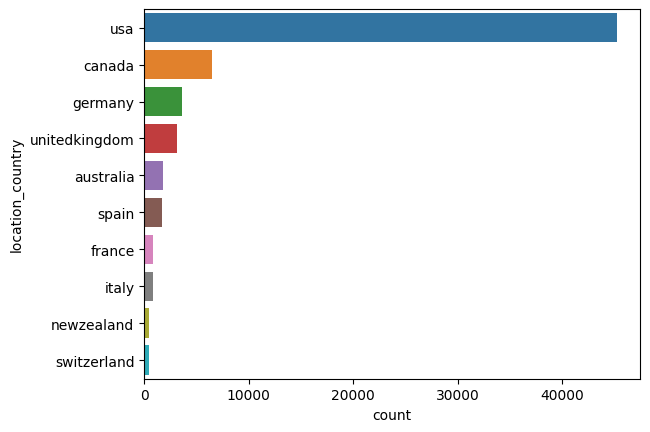

In [23]:
# usa 범주에 극단적으로 몰려있음
sns.barplot(x=users.location_country.value_counts()[:10], y=users.location_country.value_counts().index[:10])

## age
요약:
- 결측 비율이 0.41로 꽤 높은 편
- 30대 전후로 많은 편이며 약간 right-skewed 형태 (log 변환 고려?)
- age 범주화도 고려

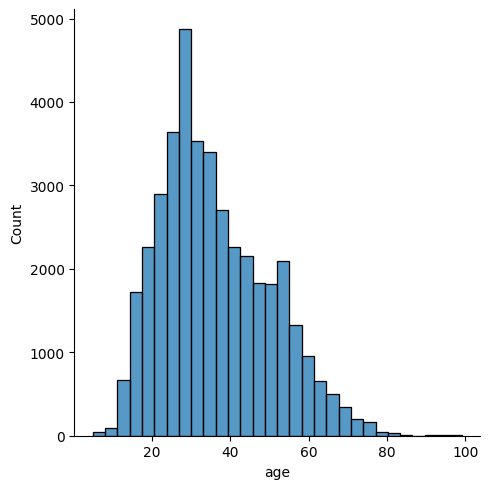

In [24]:
sns.displot(users.age, bins = 30)

In [25]:
# age 결측 비율: 0.41 -> 꽤 높은 편
print(f"{users.age.isnull().sum() / users.shape[0]:.2f}")

0.41


In [41]:
def age_categorize(age):
    if age <= 20:
        cate_age = 1
    elif age <= 40:
        cate_age = 2
    elif age <= 60:
        cate_age = 3
    elif age <= 80:
        cate_age = 4
    else:
        cate_age = np.nan
    return cate_age

users['categorized_age'] = users['age'].apply(age_categorize)

In [42]:
users['categorized_age'].value_counts(dropna=False)

categorized_age
NaN    27885
2.0    21857
3.0    11338
1.0     4793
4.0     2219
Name: count, dtype: int64

<Axes: xlabel='categorized_age', ylabel='Count'>

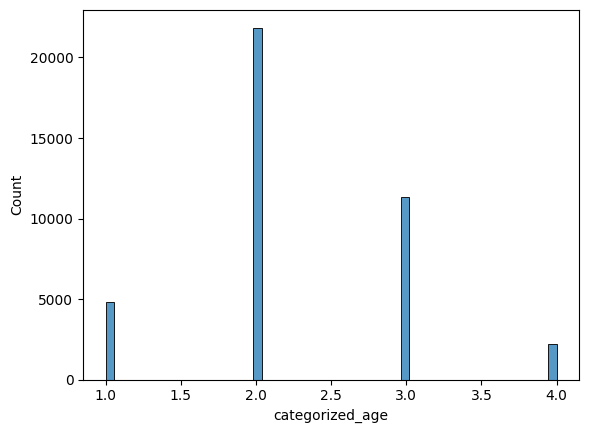

In [43]:
sns.histplot(users['categorized_age'])